In [0]:

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [25]:

# Read dataset obtained from previous step where semantic scores are calculated
from google.colab import files
uploaded = files.upload()

Saving Toys_and_Games.csv to Toys_and_Games (1).csv


In [0]:
import io
toyData = pd.read_csv(io.BytesIO(uploaded['Toys_and_Games.csv']))

In [27]:
toyData.head(4)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,PreProcessed_reviewText,subjectivity_score,flesch_index,polarity_score,entropy_score,DaleChall_Index,helpful_ratio,LexDiversityRatio
0,439893577,"[1, 1]",4,Love the magnet easel... great for moving to d...,"03 28, 2014",A8R62G708TSCM,love the magnet easel great for moving to diff...,0.650000,8.3,0.433333,4.459432,7.588870,0.750000,0.187500
1,439893577,"[1, 1]",5,Both sides are magnetic. A real plus when you...,"01 28, 2013",A21KH420DK0ICA,both sides are magnetic a real plus when your...,0.450000,29.4,0.333333,5.497670,6.688048,0.200000,0.056650
2,439893577,"[0, 0]",5,Bought one a few years ago for my daughter and...,"02 8, 2014",AR29QK6HPFYZ4,bought one a few years ago for my daughter and...,0.450000,10.7,0.250000,4.389365,7.461429,0.500000,0.143836
3,439893577,"[1, 1]",4,I have a stainless steel refrigerator therefor...,"05 5, 2014",ACCH8EOML6FN5,i have a stainless steel refrigerator therefor...,0.383333,18.1,0.300000,4.926721,6.906960,0.666667,0.095833


In [29]:

# Make groups of dataset based on distinct values  of column 'overall' and compute average values of each semantic score for each group
groupedData=toyData.groupby(['overall']).mean()
groupedData

,subjectivity_score,flesch_index,polarity_score,entropy_score,DaleChall_Index,helpful_ratio,LexDiversityRatio
overall,,,,,,,
1,0.496235,43.495212,0.019646,5.631696,7.154661,0.618717,0.074920
2,0.500991,49.697695,0.071962,5.773701,7.160521,0.643680,0.066893
3,0.504213,48.623105,0.128070,5.727293,7.204525,0.638250,0.070686
4,0.512541,47.424367,0.183872,5.698653,7.269105,0.642350,0.072824
5,0.529315,33.991421,0.252520,5.350829,7.307210,0.621209,0.095418


In [0]:

# Adding column 'overall' to grouped data
groupedData['overall']=[1,2,3,4,5]

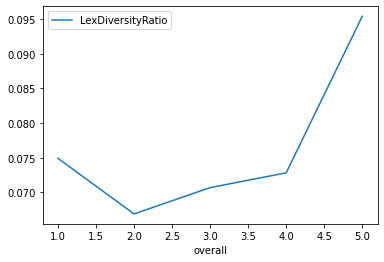

In [34]:

# Visualize line plot on grouped data for 'subjectivity_score' column vs 'overall' column
lines=groupedData.plot.line(x='overall',y='LexDiversityRatio')

In [39]:


# Compute covariance between 'overall' and 'Lex Diversity Ratio' columns
covariance = cov(toyData['overall'], toyData['LexDiversityRatio'])
print('Covriance is: ',covariance)

Covriance is:  [[0.99266077 0.00956751]
 [0.00956751 0.00314694]]


In [40]:

# Compute pearson correlation between 'overall' and 'Lex Diversity Ratio' columns
corr, _ = pearsonr(toyData['overall'], toyData['LexDiversityRatio'])
print('Pearsons correlation between rating and Lex Diversity Ratio is: %.3f' % corr)

Pearsons correlation between rating and Lex Diversity Ratio is: 0.171


In [42]:

# Compute spearnmans correlation between 'overall' and 'Lex Diversity Ratio' columns
corr, _ = spearmanr(toyData['overall'], toyData['LexDiversityRatio'])
print('Spearmans correlation between rating and Lex Diversity Ratio is: %.3f' % corr)

Spearmans correlation between rating and Lex Diversity Ratio is: 0.206


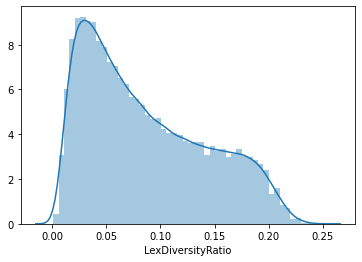

In [43]:


# Visualize distplot of 'Lex Diversity Ratio' column
sns.distplot(toyData.LexDiversityRatio)
plt.show()

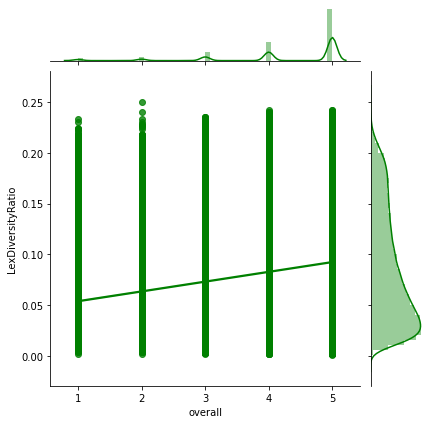

In [44]:

# Visualize jointplot of 'Lex Diversity Ratio' column again 'overall' column
sns.jointplot(data=toyData, x='overall', y='LexDiversityRatio', kind='reg', color='g')
plt.show()